In [18]:
%timeit
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [46]:
check = yf.Ticker("ETR").info
check

{'zip': '70113', 'sector': 'Utilities', 'fullTimeEmployees': 12000, 'longBusinessSummary': "Entergy Corporation, together with its subsidiaries, engages in the production and retail distribution of electricity in the United States. The company operates in two segments, Utility and Entergy Wholesale Commodities. The Utility segment generates, transmits, distributes, and sells electric power in portions of Arkansas, Louisiana, Mississippi, and Texas, including the City of New Orleans; and distributes natural gas. The Entergy Wholesale Commodities segment engages in the ownership, operation, and decommissioning of nuclear power plants; and ownership of interests in non-nuclear power plants that sell electric power to wholesale customers, as well as provides services to other nuclear power plant owners. It generates electricity through gas, nuclear, coal, hydro, and solar power sources. The company sells energy to retail power providers, utilities, electric power co-operatives, power tradi

In [20]:
ibkr = pd.read_excel("Python_BKR_WISHLIST.xlsx")

In [21]:
# ibkr = pd.read_csv("IBKR.csv", encoding='ISO-8859-1', on_bad_lines='skip')

In [22]:
ibkr.drop(['биржа', 'отрасль', 'Unnamed: 7'], axis=1, inplace= True)

In [23]:
ibkr.columns = ['Company_name', 'Symbol', 'Number of shares', 'Price of share', 'Total_value_share, USD']

In [24]:
# Delete empty rows (condotion of no total value share = 0)
ibkr.dropna(subset=['Total_value_share, USD', 'Number of shares'], inplace=True)

In [25]:
# Insert new column Sector
ibkr.insert(2, "Sector", "XXX")
ibkr.insert(3, "Industry", "XXX")
ibkr.insert(7, "Weight,%", "XXX")

In [26]:
ibkr.isna().sum()

Company_name              0
Symbol                    0
Sector                    0
Industry                  0
Number of shares          0
Price of share            0
Total_value_share, USD    0
Weight,%                  0
dtype: int64

In [27]:
ibkr.reset_index(drop = True, inplace = True)

In [28]:
ibkr.tail(50)

,Company_name,Symbol,Sector,Industry,Number of shares,Price of share,"Total_value_share, USD","Weight,%"
62,Masco Corporation,MAS,XXX,XXX,3.0,53.00,159.00,XXX
63,Monster Beverage Corp,MNST,XXX,XXX,3.0,89.00,267.00,XXX
64,Microsoft,MSFT,XXX,XXX,3.0,288.00,864.00,XXX
65,NextEra Energy,NEE,XXX,XXX,28.0,89.00,2492.00,XXX
66,NIKE,NKE,XXX,XXX,4.0,112.00,448.00,XXX
67,NIO,NIO,XXX,XXX,3.0,19.00,57.00,XXX
68,ServiceNow,NOW,XXX,XXX,4.0,513.00,2052.00,XXX
69,Intellia Therapeutics,NTLA,XXX,XXX,3.0,65.00,195.00,XXX
70,Nucor Corporation,NUE,XXX,XXX,28.0,141.00,3948.00,XXX
71,Nvidia,NVDA,XXX,XXX,12.0,180.00,2160.00,XXX


In [29]:
my_tickers = ibkr["Symbol"].tolist()
tickers = yf.Tickers(my_tickers)
i = 0
for ticker in my_tickers:
    stock_info = yf.Ticker(ticker).info
    ibkr.loc[i, 'Sector'] = stock_info.get('sector', 'ETF')
    ibkr.loc[i, 'Industry'] = stock_info.get('industry', 'NA')
    ibkr.loc[i, "Price of share"] = yf.Ticker(ticker).fast_info["last_price"]
    i += 1


In [30]:
ibkr.head(10)

,Company_name,Symbol,Sector,Industry,Number of shares,Price of share,"Total_value_share, USD","Weight,%"
0,APPLE,AAPL,Technology,Consumer Electronics,22.0,143.960007,3718.0,XXX
1,ACADIA Pharmaceuticals,ACAD,Healthcare,Biotechnology,3.0,18.660000,48.0,XXX
2,Adobe,ADBE,Technology,Software—Infrastructure,2.0,365.820007,876.0,XXX
3,Autodesk,ADSK,Technology,Software—Application,8.0,208.460007,1800.0,XXX
4,Albemarle Corporation,ALB,Basic Materials,Specialty Chemicals,13.0,279.450012,3354.0,XXX
5,Alarm holdings,ALRM,Technology,Software—Application,3.0,52.849998,225.0,XXX
6,Altair Engineering,ALTR,Technology,Software—Infrastructure,5.0,52.650002,280.0,XXX
7,Applied Materials,AMAT,Technology,Semiconductor Equipment & Materials,11.0,115.580002,1144.0,XXX
8,AMD,AMD,Technology,Semiconductors,13.0,75.160004,1274.0,XXX
9,amgen,AMGN,Healthcare,Drug Manufacturers—General,1.0,254.880005,250.0,XXX


In [31]:
ibkr['Total_value_share, USD'] = ibkr['Number of shares'] * ibkr['Price of share'] 

In [32]:
total = ibkr["Total_value_share, USD"].sum()
ibkr["Weight,%"] = (ibkr["Total_value_share, USD"]/total*100).round(2)
ibkr["Total, USD"]= ibkr["Total_value_share, USD"].astype(int).cumsum()
# Creates a line with total:
# ibkr.loc['Total'] = pd.Series(ibkr['Total_value_share, USD'].sum(), index=['Total_value_share, USD'])

In [33]:
ibkr.tail(10)

,Company_name,Symbol,Sector,Industry,Number of shares,Price of share,"Total_value_share, USD","Weight,%","Total, USD"
102,Estee Lauder,EL,Consumer Defensive,Household & Personal Products,7.0,273.220001,1912.540009,1.55,108592
103,Victoria's Secret & Co.,VSCO,Consumer Cyclical,Apparel Retail,2.0,39.639999,79.279999,0.06,108671
104,Netflix,NFLX,Communication Services,Entertainment,7.0,364.869995,2554.089966,2.08,111225
105,Tractor Supply Company,TSCO,Consumer Cyclical,Specialty Retail,5.0,226.720001,1133.600006,0.92,112358
106,Google,GOOGL,Communication Services,Internet Content & Information,35.0,97.519997,3413.199883,2.77,115771
107,Lam Research Corporation,LRCX,Technology,Semiconductor Equipment & Materials,6.0,497.750000,2986.500000,2.43,118757
108,Humana,HUM,Healthcare,Healthcare Plans,6.0,499.359985,2996.159912,2.44,121753
109,Sempra Energy,SRE,Utilities,Utilities—Diversified,3.0,160.500000,481.500000,0.39,122234
110,Southern Company,SO,Utilities,Utilities—Regulated Electric,3.0,67.519997,202.559990,0.16,122436
111,Entergy Corp,ETR,Utilities,Utilities—Regulated Electric,5.0,108.470001,542.350006,0.44,122978


In [34]:
sector = ibkr.groupby(by=["Sector"]).sum()
sector.drop(['Number of shares', 'Price of share', 'Total, USD'], axis=1, inplace= True)
sector.reset_index(inplace = True)
sector

,Sector,"Total_value_share, USD","Weight,%"
0,Basic Materials,8609.050369,6.99
1,Communication Services,9293.189888,7.55
2,Consumer Cyclical,12816.820040,10.41
3,Consumer Defensive,16494.059914,13.41
4,ETF,7921.679810,6.44
5,Financial Services,5072.560059,4.13
6,Healthcare,15962.999951,12.99
7,Industrials,14991.640249,12.19
8,Technology,28155.020492,22.86
9,Utilities,3714.890046,3.01


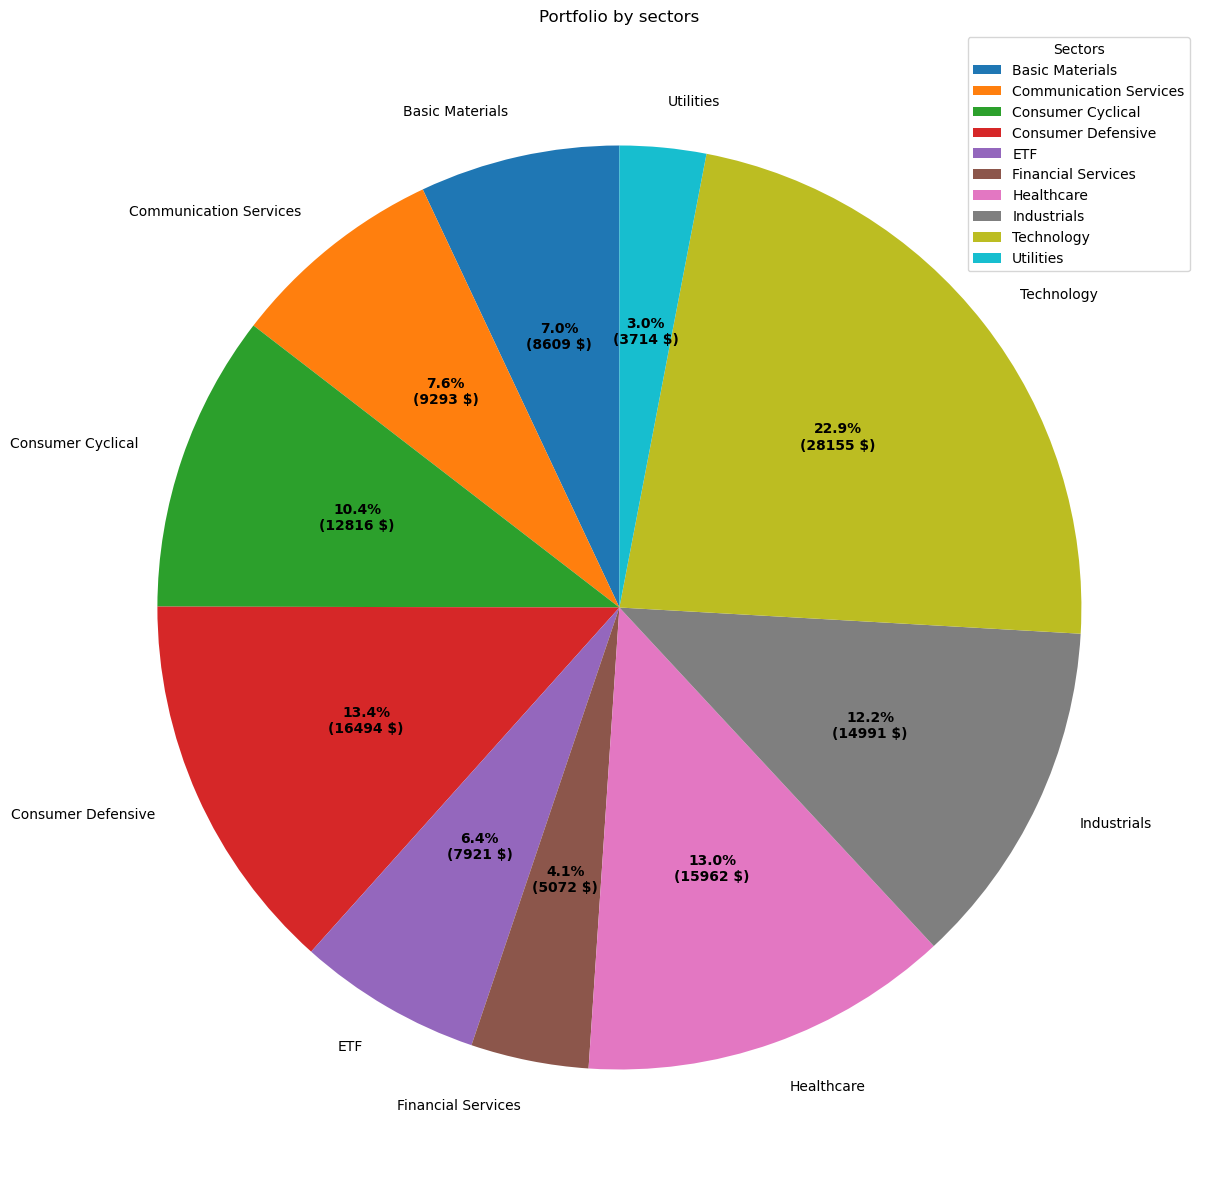

In [35]:
# Creating a Matplotlib plot
# Creating autocpt arguments
def func(pct, allvalues):
    absolute = int(pct / 100.*np.sum(allvalues))
    return "{:.1f}%\n({:d} $)".format(pct, absolute)

# Creating plot
fig, ax = plt.subplots(figsize =(15, 15))
wedges, texts, autotexts = ax.pie(sector['Total_value_share, USD'],
                                  autopct = lambda pct: func(pct, sector['Total_value_share, USD']),
                                  # explode = explode,
                                  labels = sector['Sector'],
                                  # shadow = True,
                                  # colors = colors,
                                  startangle = 90)
                                  # wedgeprops = wp,
                                  # textprops = dict(color ="magenta"))
 
# Adding legend
ax.legend(wedges, sector['Sector'],
          title ="Sectors")
          # loc ="center"
         # bbox_to_anchor =(1, 0, 0.5, 1))
 
plt.setp(autotexts, size = 10, weight ="bold")
ax.set_title("Portfolio by sectors")
 
# show plot
plt.show();

In [36]:
basic_materials=ibkr[ibkr["Sector"] == "Basic Materials"]
basic_materials.drop(['Total, USD'], axis=1, inplace= True)
basic_materials.head(50)

/var/folders/gr/qrcwg71x4nq4bcxqh_zry7mh0000gn/T/ipykernel_41544/1557978065.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  basic_materials.drop(['Total, USD'], axis=1, inplace= True)


,Company_name,Symbol,Sector,Industry,Number of shares,Price of share,"Total_value_share, USD","Weight,%"
4,Albemarle Corporation,ALB,Basic Materials,Specialty Chemicals,13.0,279.450012,3632.850159,2.95
47,International Flavors & Fragrances,IFF,Basic Materials,Specialty Chemicals,2.0,110.620003,221.240005,0.18
70,Nucor Corporation,NUE,Basic Materials,Steel,28.0,169.820007,4754.960205,3.86


In [37]:
finacial_services=ibkr[ibkr["Sector"] == "Financial Services"]
finacial_services.drop(['Total, USD'], axis=1, inplace= True)
finacial_services.head(50)

/var/folders/gr/qrcwg71x4nq4bcxqh_zry7mh0000gn/T/ipykernel_41544/538391176.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  finacial_services.drop(['Total, USD'], axis=1, inplace= True)


,Company_name,Symbol,Sector,Industry,Number of shares,Price of share,"Total_value_share, USD","Weight,%"
15,American Express,AXP,Financial Services,Credit Services,3.0,155.880005,467.640015,0.38
45,Intercontinental Exchange,ICE,Financial Services,Financial Data & Stock Exchanges,12.0,108.190002,1298.280029,1.06
60,Mastercard,MA,Financial Services,Credit Services,4.0,377.239990,1508.959961,1.23
90,Visa,V,Financial Services,Credit Services,8.0,224.710007,1797.680054,1.46


In [38]:
utilities=ibkr[ibkr["Sector"] == "Utilities"]
utilities.drop(['Total, USD'], axis=1, inplace= True)
utilities.head(50)

/var/folders/gr/qrcwg71x4nq4bcxqh_zry7mh0000gn/T/ipykernel_41544/242285005.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  utilities.drop(['Total, USD'], axis=1, inplace= True)


,Company_name,Symbol,Sector,Industry,Number of shares,Price of share,"Total_value_share, USD","Weight,%"
17,Azure Power Global,AZRE,Utilities,Utilities—Renewable,5.0,4.150000,20.750000,0.02
27,Dominion Energy,D,Utilities,Utilities—Regulated Electric,3.0,62.580002,187.740005,0.15
65,NextEra Energy,NEE,Utilities,Utilities—Regulated Electric,28.0,76.400002,2139.200043,1.74
99,Essential Utilities Inc,WTRG,Utilities,Utilities—Regulated Water,3.0,46.930000,140.790001,0.11
109,Sempra Energy,SRE,Utilities,Utilities—Diversified,3.0,160.500000,481.500000,0.39
110,Southern Company,SO,Utilities,Utilities—Regulated Electric,3.0,67.519997,202.559990,0.16
111,Entergy Corp,ETR,Utilities,Utilities—Regulated Electric,5.0,108.470001,542.350006,0.44


In [39]:
technology=ibkr[ibkr["Sector"] == "Technology"]
technology.drop(['Total, USD'], axis=1, inplace= True)
technology.head(50)

/var/folders/gr/qrcwg71x4nq4bcxqh_zry7mh0000gn/T/ipykernel_41544/1066047931.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  technology.drop(['Total, USD'], axis=1, inplace= True)


,Company_name,Symbol,Sector,Industry,Number of shares,Price of share,"Total_value_share, USD","Weight,%"
0,APPLE,AAPL,Technology,Consumer Electronics,22.0,143.960007,3167.120148,2.57
2,Adobe,ADBE,Technology,Software—Infrastructure,2.0,365.820007,731.640015,0.59
3,Autodesk,ADSK,Technology,Software—Application,8.0,208.460007,1667.680054,1.36
5,Alarm holdings,ALRM,Technology,Software—Application,3.0,52.849998,158.549995,0.13
6,Altair Engineering,ALTR,Technology,Software—Infrastructure,5.0,52.650002,263.250008,0.21
7,Applied Materials,AMAT,Technology,Semiconductor Equipment & Materials,11.0,115.580002,1271.380020,1.03
8,AMD,AMD,Technology,Semiconductors,13.0,75.160004,977.080048,0.79
11,Agora,API,Technology,Software—Application,4.0,4.160000,16.639999,0.01
14,Broadcom Inc,AVGO,Technology,Semiconductors,5.0,598.580017,2992.900085,2.43
16,Alteryx,AYX,Technology,Software—Application,4.0,55.340000,221.360001,0.18


In [40]:
ibkr.to_excel("230103_Pandas_IBKR.xlsx")